# Stochastic Gradient Descent on Linear Regression

The “Crowdedness at the Campus Gym” dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information.

- number_people: this is the number of people at the gym at each observation. This will be our target variable or label.
- date: a string value with the specific date and time information.
- timestamp: an integer (int), with the number of seconds since the start of the day (00:00).
- dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- is_holiday: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- temperature: a float, defining the temperature during the day of the observation in Fahrenheit.
- isstartof_semester: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- is_during_semester: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- hour: an integer (int) for the hour of the day from 0 to 23.

In [26]:
# Import all necessary libraries to be used

import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
cwd = pd.read_csv('crowdness_gym_data.csv') # Load the dataset

cwd.head() # Display the first few roles of the dataset

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [28]:
cwd.shape # Number of Observation & Features

(62184, 11)

In [29]:
cwd.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [30]:
cols = cwd.columns

cols

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [31]:
cwd.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

In [32]:
cwd.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [33]:
corr = abs(cwd.corr()) # Select the variable with high correlation against the cluster and plotting it with the scatter plot
high_corr = corr['number_people'].sort_values(ascending=False)[1:5].index

high_corr

Index(['hour', 'timestamp', 'temperature', 'is_during_semester'], dtype='object')

/tmp/ipykernel_720/1968622304.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cwd.hist(ax=ax)


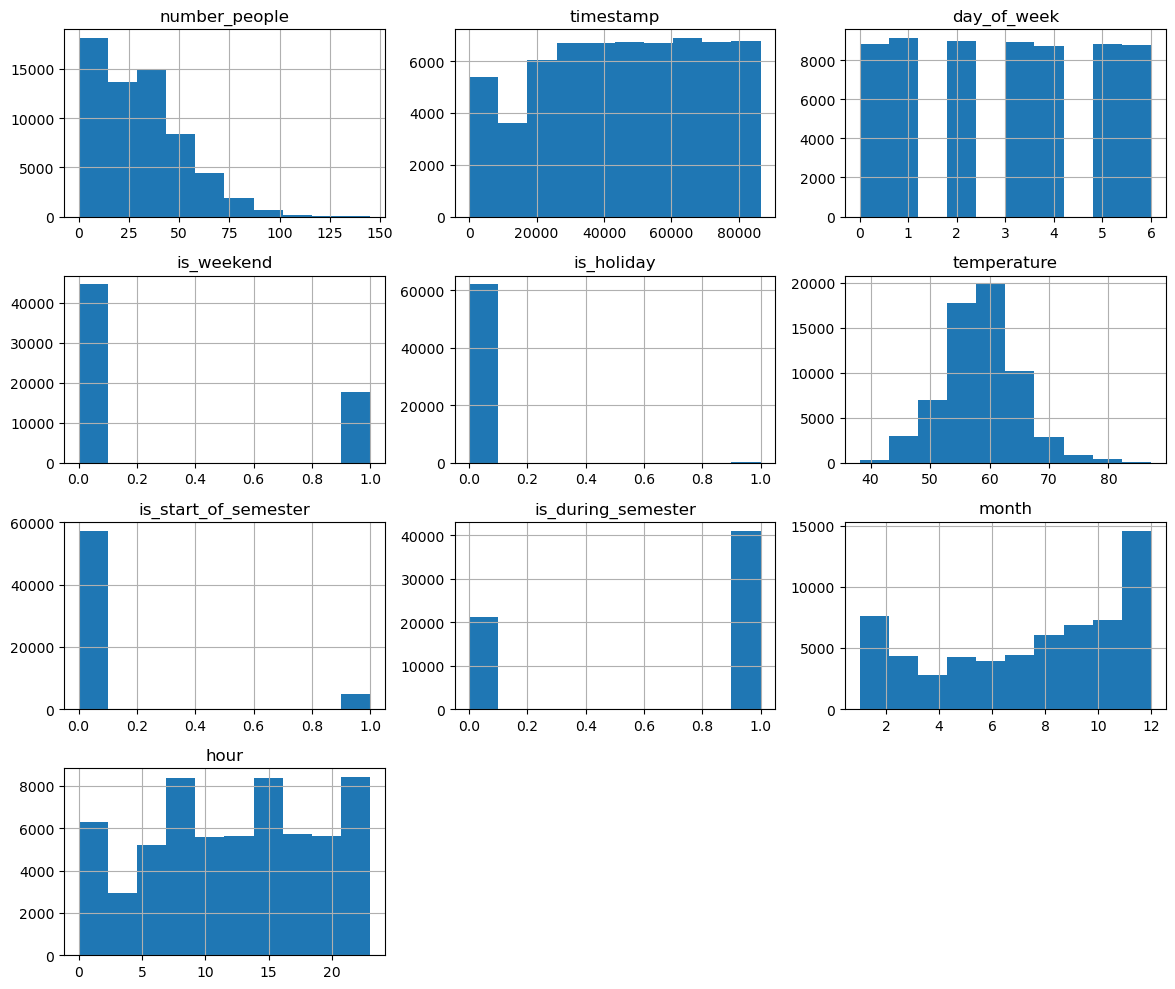

In [34]:
# Checking out their relationship with the help of an histogram

fig, ax = plt.subplots(figsize=(12, 10))
cwd.hist(ax=ax)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

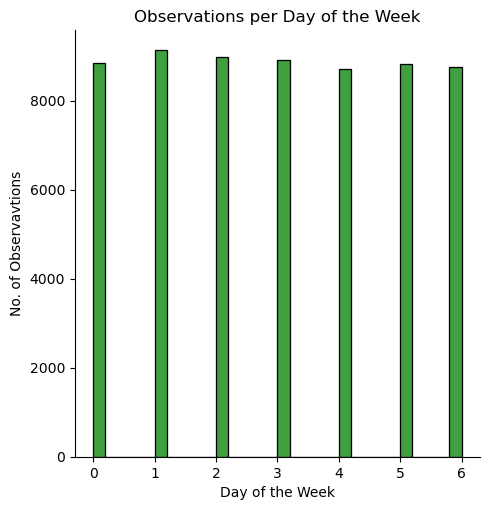

In [35]:
plt.figure(figsize=(8, 8))

sns.displot(cwd['day_of_week'], color='g')
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

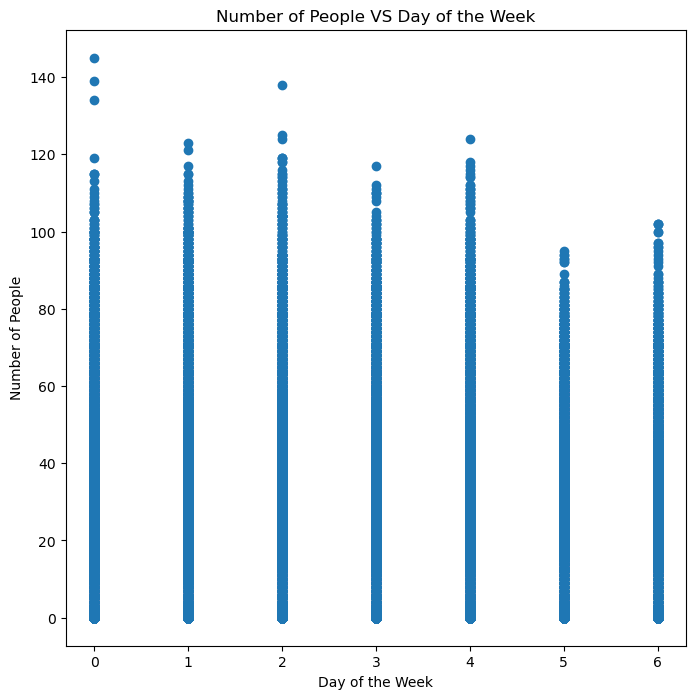

In [36]:
plt.figure(figsize=(8, 8))

plt.scatter(cwd['day_of_week'], cwd['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

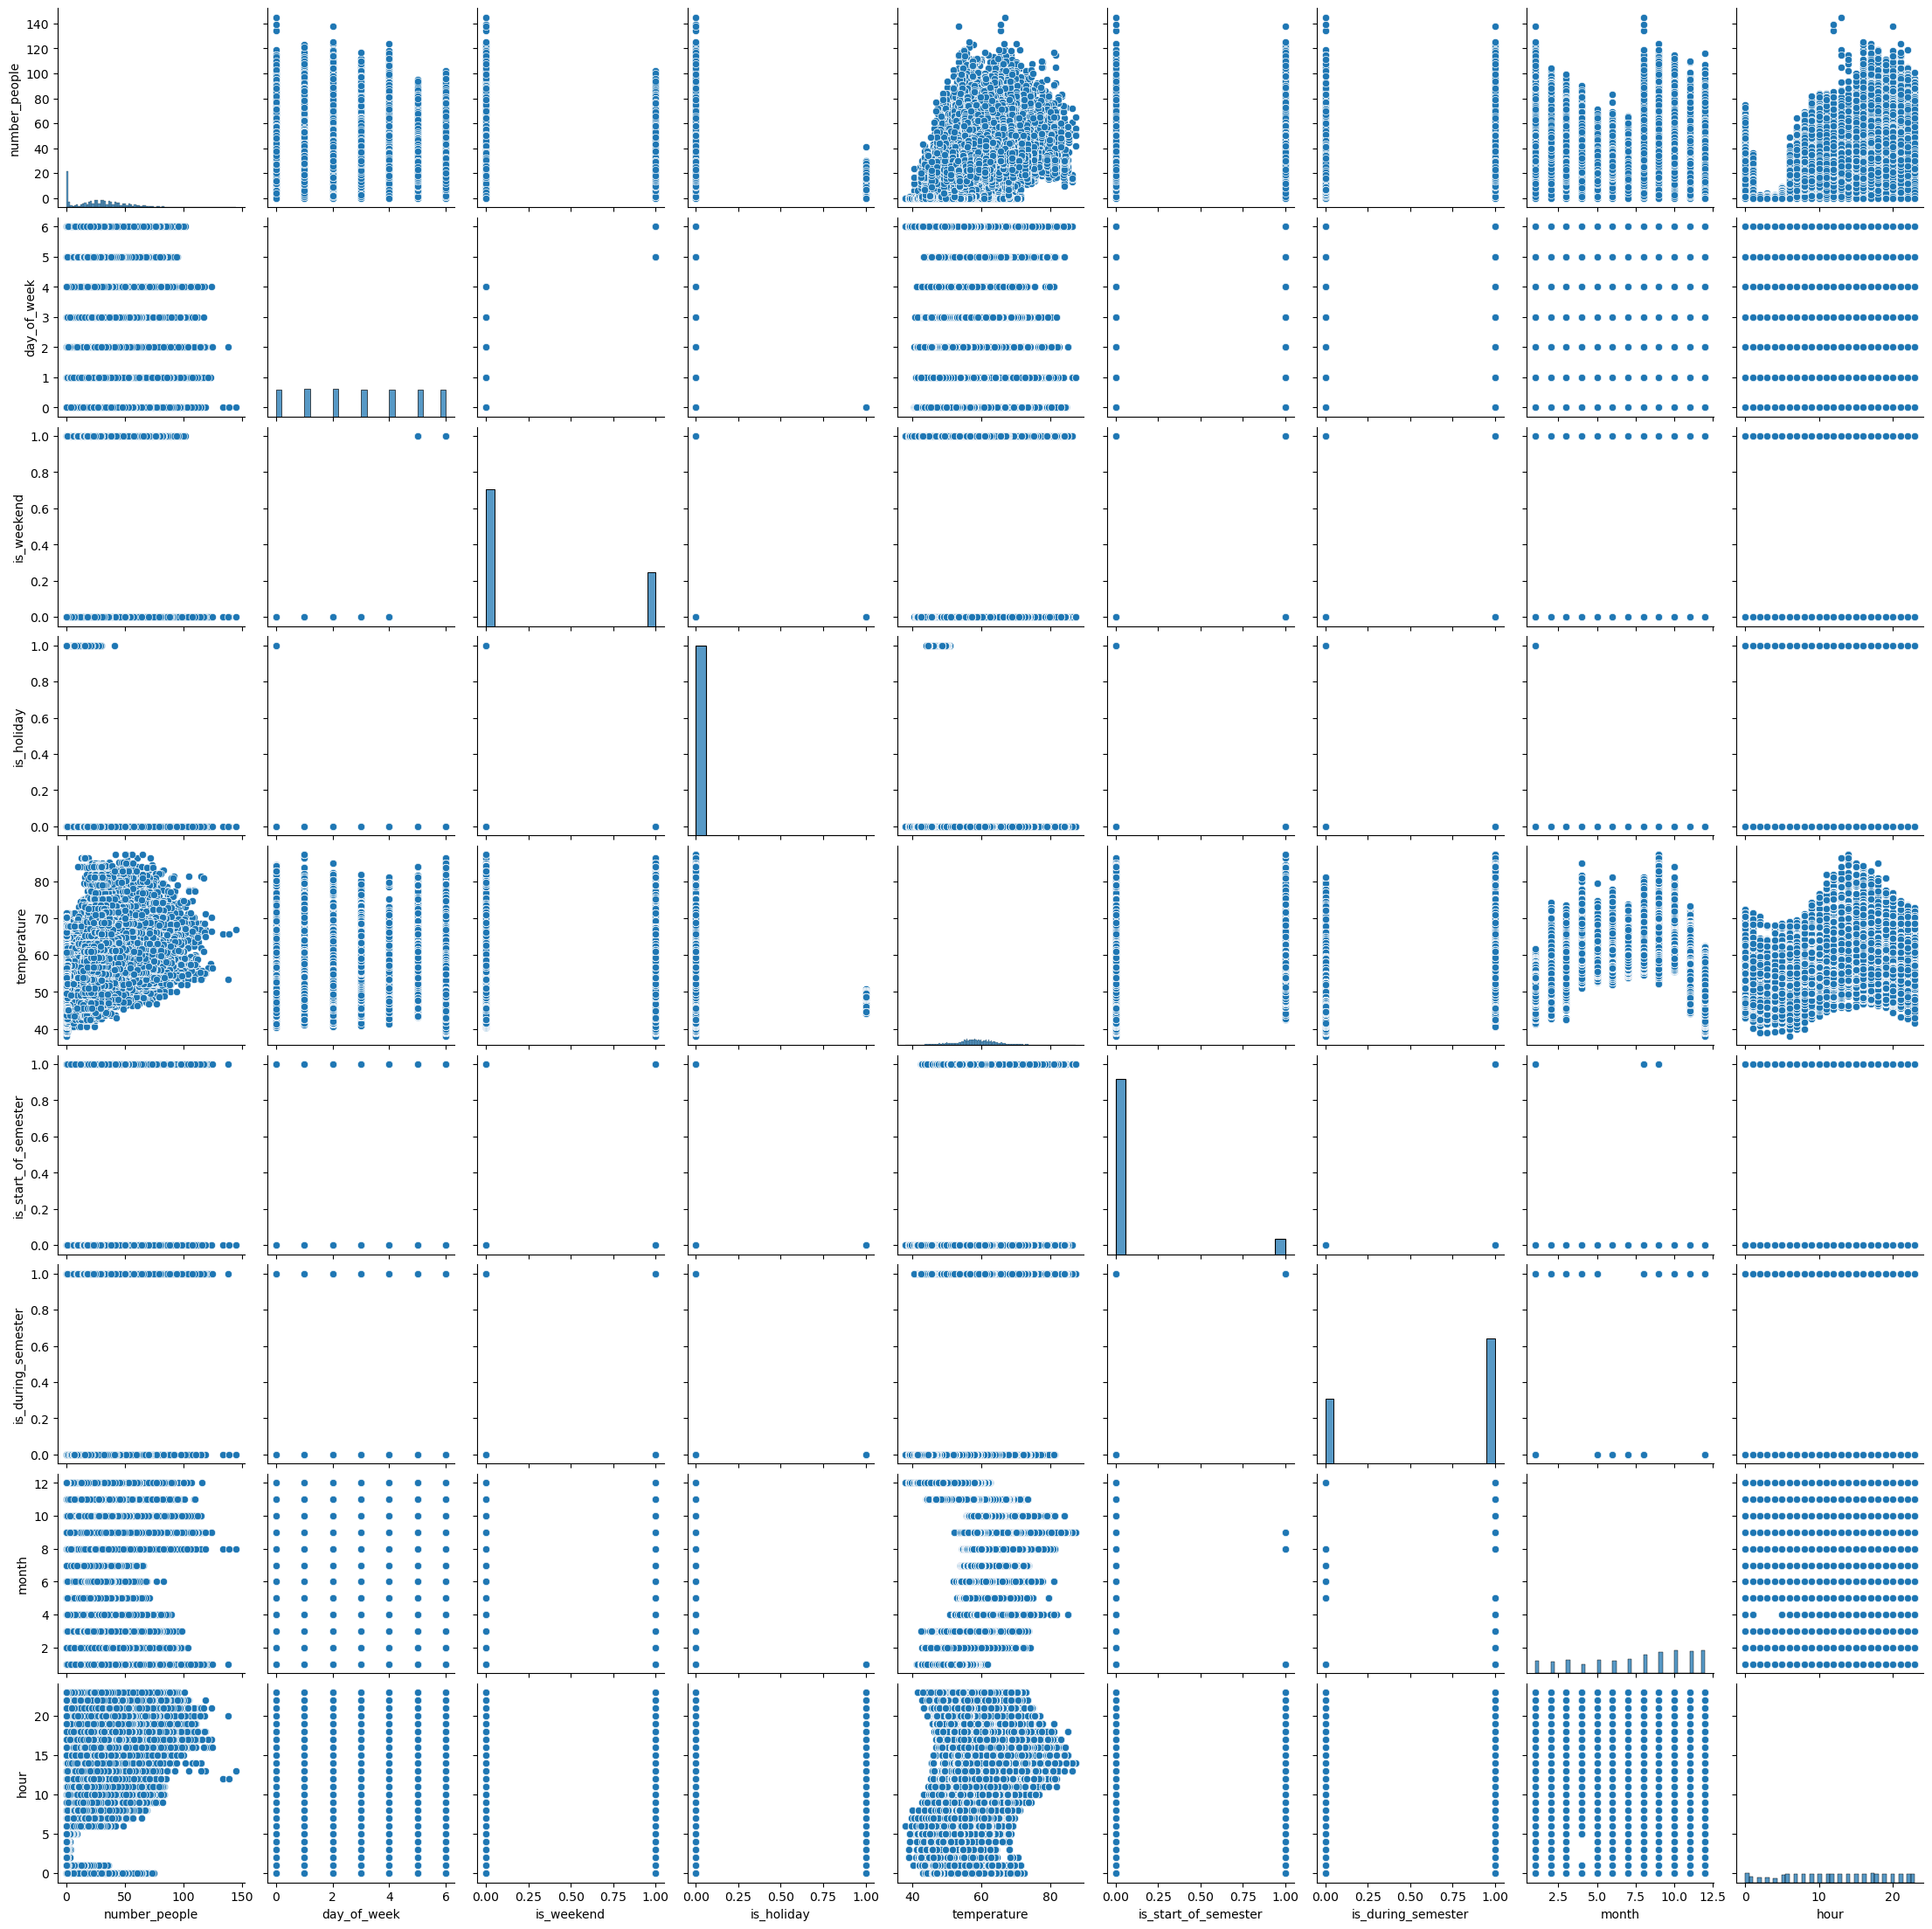

In [50]:
sns.pairplot(cwd)

The features drop are of no use to our model

In [37]:
cwd = cwd.drop(['date', 'timestamp'], axis=1)
data = cwd.values

data

array([[37.,  4.,  0., ...,  0.,  8., 17.],
       [45.,  4.,  0., ...,  0.,  8., 17.],
       [40.,  4.,  0., ...,  0.,  8., 17.],
       ...,
       [25.,  5.,  1., ...,  1.,  3., 19.],
       [18.,  5.,  1., ...,  1.,  3., 19.],
       [23.,  5.,  1., ...,  1.,  3., 19.]])

In [38]:
cwd.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


I need to split the data into train and test sets. I am using a test size of 30% (70% of the data for training and 30% for testing). I am also setting the random state, so as to be able to replicate in the future.

Split the dataset into train and test with the train_test_split libray and SGDRegressor for building the model

In [39]:
X = data[:, 1:]
y = data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Build the model object with SGDRegressor. Setting the learning rate to optimal, the loss function to hubber loss and using elasticnet for the penalty.

The fitting the model with the training data. I set the random_state so as to be able to reproduce the training.

In [40]:
model = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 20)

model.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=20)

Now that we have trained our model, it is time to predict the target variable with the test data. I will be using Mean Squared Error, Mean Absolute Error and R Sqared.

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Square Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R2: ', r2)

Mean Square Error:  258.05152792664114
Mean Absolute Error:  12.170260872010008
R2:  0.4979684633977304


Mean Squared Error and Mean Absolute Error are fairly high (the closer to 0 the higher the accuracy), meaning the model is not incredibly accurate. With the R2 Score we can see there is a correlation of 0.49797, wich is not that good since we want it to be as close to 1 as possible.

To try and improve the model, we can scale the features to normalize them from -1 to 1, this mught help improve the model. For this, I will be using the StandardScaler from Scikit Learn.

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we can build another model with the scaled data and see if we can improve it.

I am using the same random_state for consistent results.

In [44]:
model2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 20)

In [45]:
model2.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=20)

In [46]:
y_pred2 = model2.predict(X_test_scaled)

In [47]:
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print('Mean Square Error: ', mse2)
print('Mean Absolute Error: ', mae2)
print('R2: ', r22)

Mean Square Error:  255.47232017634443
Mean Absolute Error:  12.093315664456252
R2:  0.5029862350052136


With the scaled data, the model performs slightly better, decresing the Mean Squared Error and Mean Absolute Error and increasing the R2 score by 0.001.

## Visualizing the Results

To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.

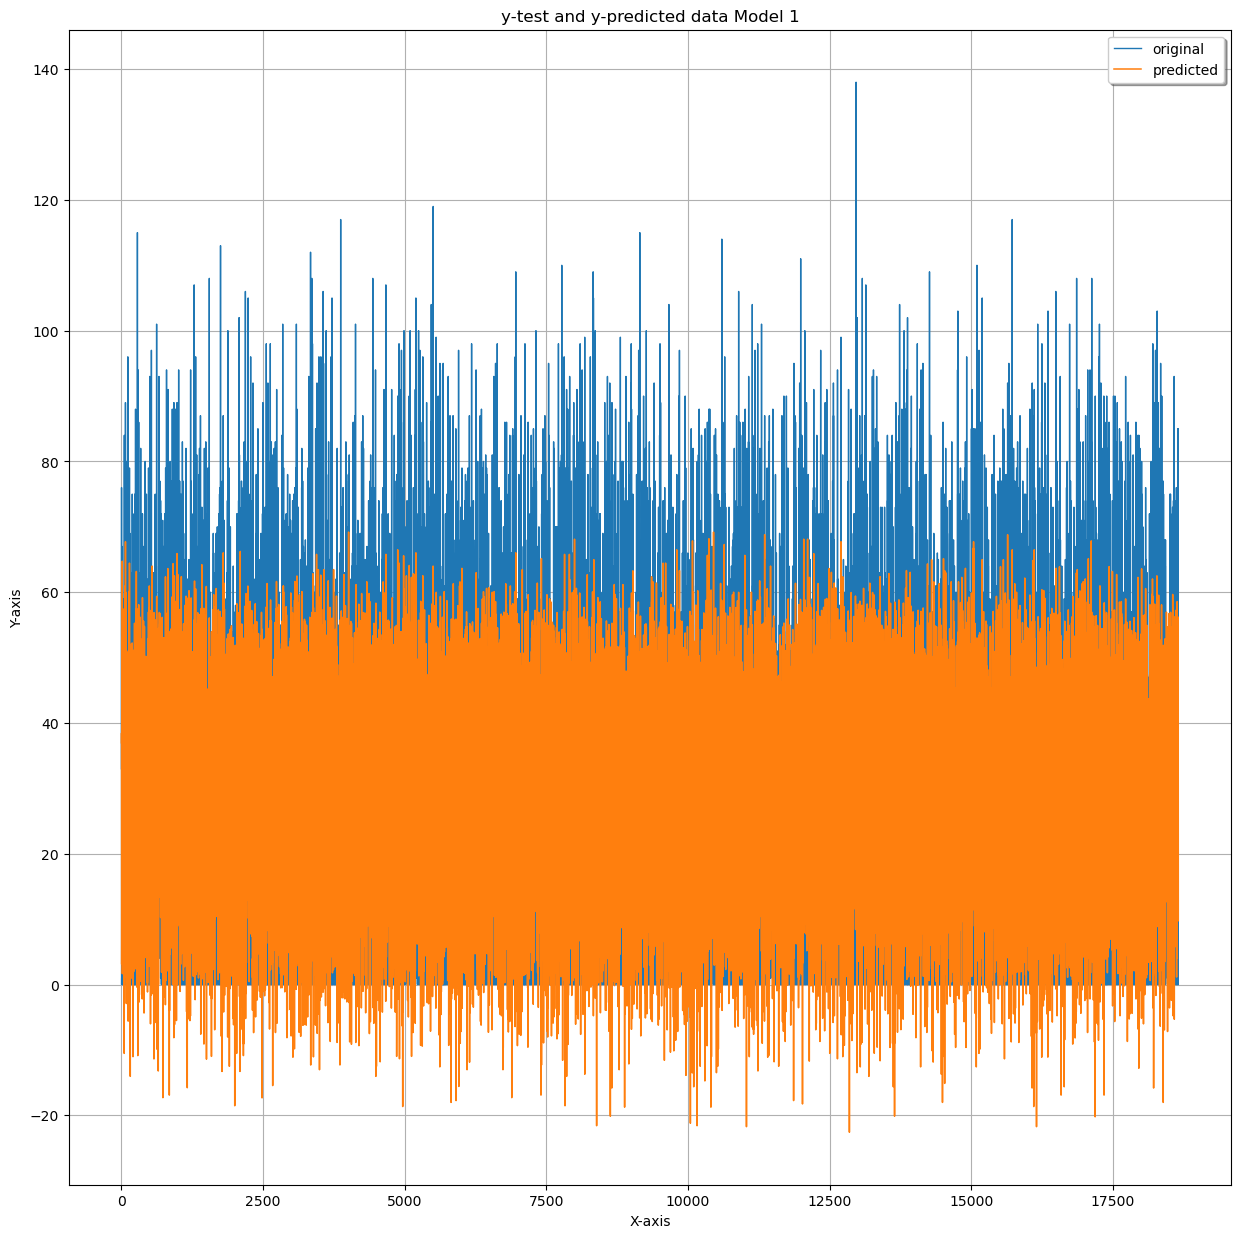

In [48]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

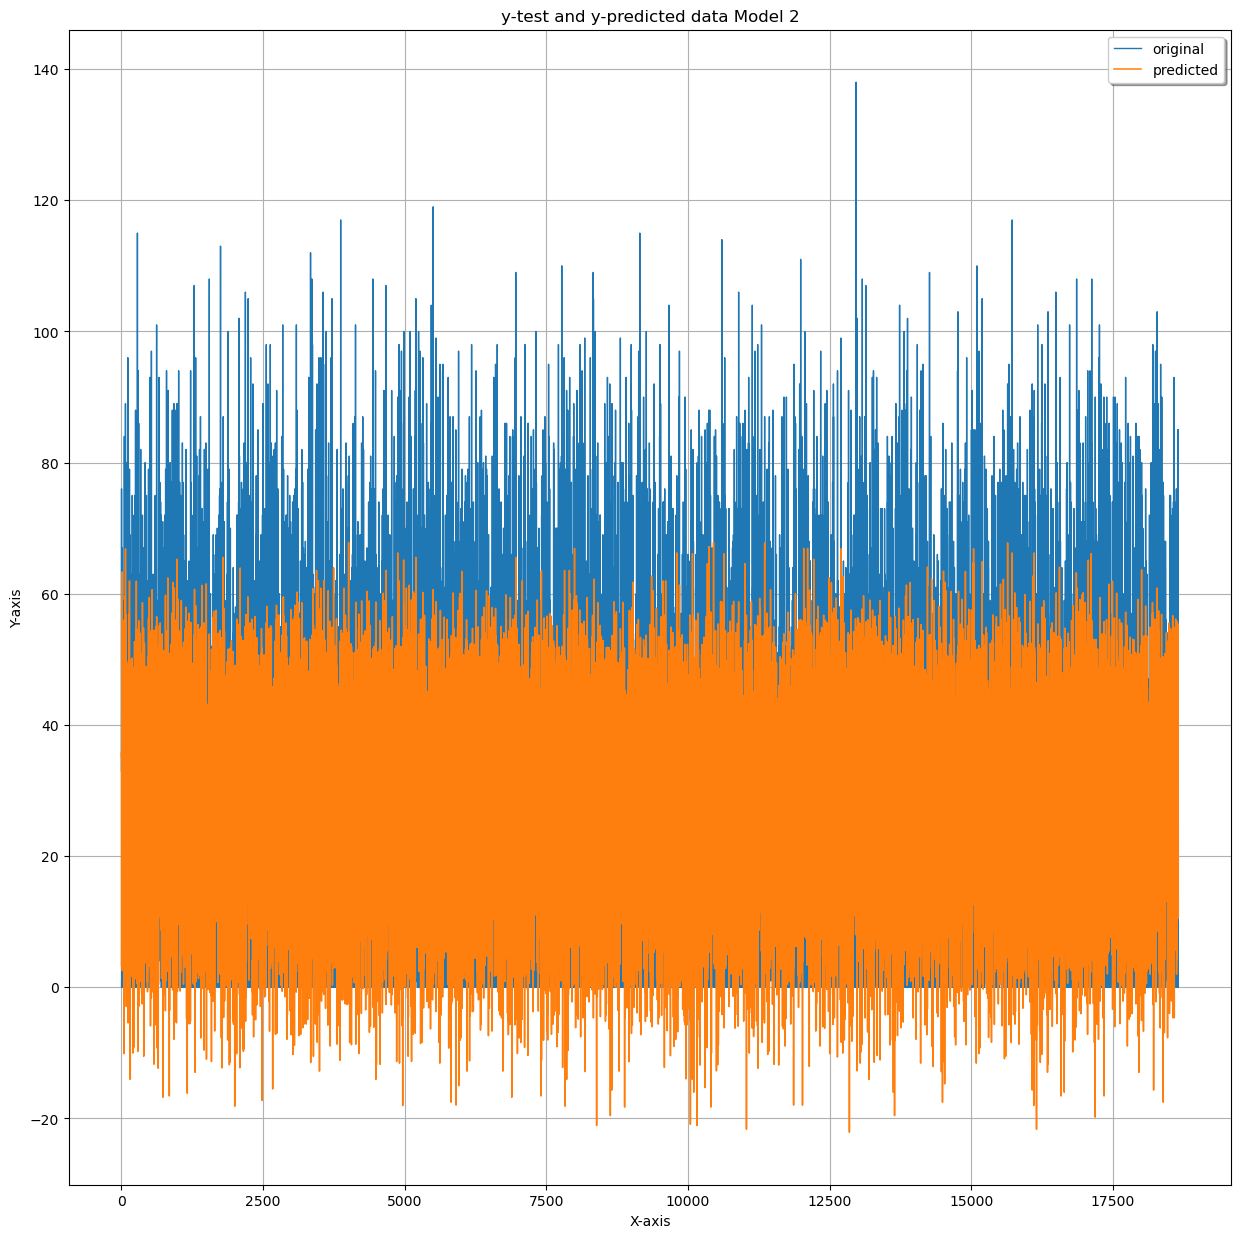

In [49]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We can improve the model by making some changes. Regarding the data, I decided to remove the timestamp variable since I believed it to be redundant, nonetheless, maybe that redundancy might help the model get higher accuracy.

Also, I might changing and testing other hyperparameters might be interesting, especially changing the loss function from huber to squared_epsilon_insensitive and maybe exploring changing the learning rate and penalty.

In general, from the data and the model, for someone who does not love to go to the gym often without having too many people there, any day at 5am seems like a safe bet.